In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix


In [2]:
data=pd.read_csv(r'C:\Users\Bhavya\Downloads\25_Projects\25_Projects\ML\Fraud Detection Using ML\payment_fraud.csv')

In [3]:
data.head()

,accountAgeDays,numItems,localTime,paymentMethod,paymentMethodAgeDays,label
0,29,1,4.745402,paypal,28.204861,0
1,725,1,4.742303,storecredit,0.000000,0
2,845,1,4.921318,creditcard,0.000000,0
3,503,1,4.886641,creditcard,0.000000,0
4,2000,1,5.040929,creditcard,0.000000,0


In [4]:
data.describe()

,accountAgeDays,numItems,localTime,paymentMethodAgeDays,label
count,39221.000000,39221.000000,39221.000000,39221.000000,39221.000000
mean,857.563984,1.084751,4.748232,122.641326,0.014278
std,804.788212,0.566899,0.389360,283.569177,0.118636
min,1.000000,1.000000,0.421214,0.000000,0.000000
25%,72.000000,1.000000,4.742303,0.000000,0.000000
50%,603.000000,1.000000,4.886641,0.012500,0.000000
75%,1804.000000,1.000000,4.962055,87.510417,0.000000
max,2000.000000,29.000000,5.040929,1999.580556,1.000000


In [5]:
data.isnull().sum()

accountAgeDays          0
numItems                0
localTime               0
paymentMethod           0
paymentMethodAgeDays    0
label                   0
dtype: int64

In [6]:
data['paymentMethod'].value_counts()

paymentMethod
creditcard     28004
paypal          9303
storecredit     1914
Name: count, dtype: int64

In [7]:
data['label'].value_counts()

label
0    38661
1      560
Name: count, dtype: int64

In [8]:
data['paymentMethod'].unique()

array(['paypal', 'storecredit', 'creditcard'], dtype=object)

In [9]:

# Import label encoder 
from sklearn import preprocessing 
label_encoder = preprocessing.LabelEncoder() 
label_encoder.fit(data['paymentMethod'].values)   
data['paymentMethod']= label_encoder.transform(data['paymentMethod'].values) 

In [10]:
data['paymentMethod'].unique()

array([1, 2, 0])

In [13]:
data.head()

,accountAgeDays,numItems,localTime,paymentMethod,paymentMethodAgeDays,label
0,29,1,4.745402,1,28.204861,0
1,725,1,4.742303,2,0.000000,0
2,845,1,4.921318,0,0.000000,0
3,503,1,4.886641,0,0.000000,0
4,2000,1,5.040929,0,0.000000,0


<Axes: xlabel='paymentMethod', ylabel='count'>

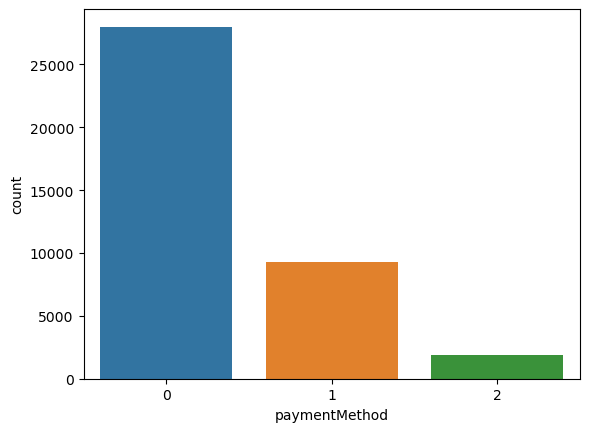

In [19]:
sns.countplot(x=data['paymentMethod'])

<Axes: >

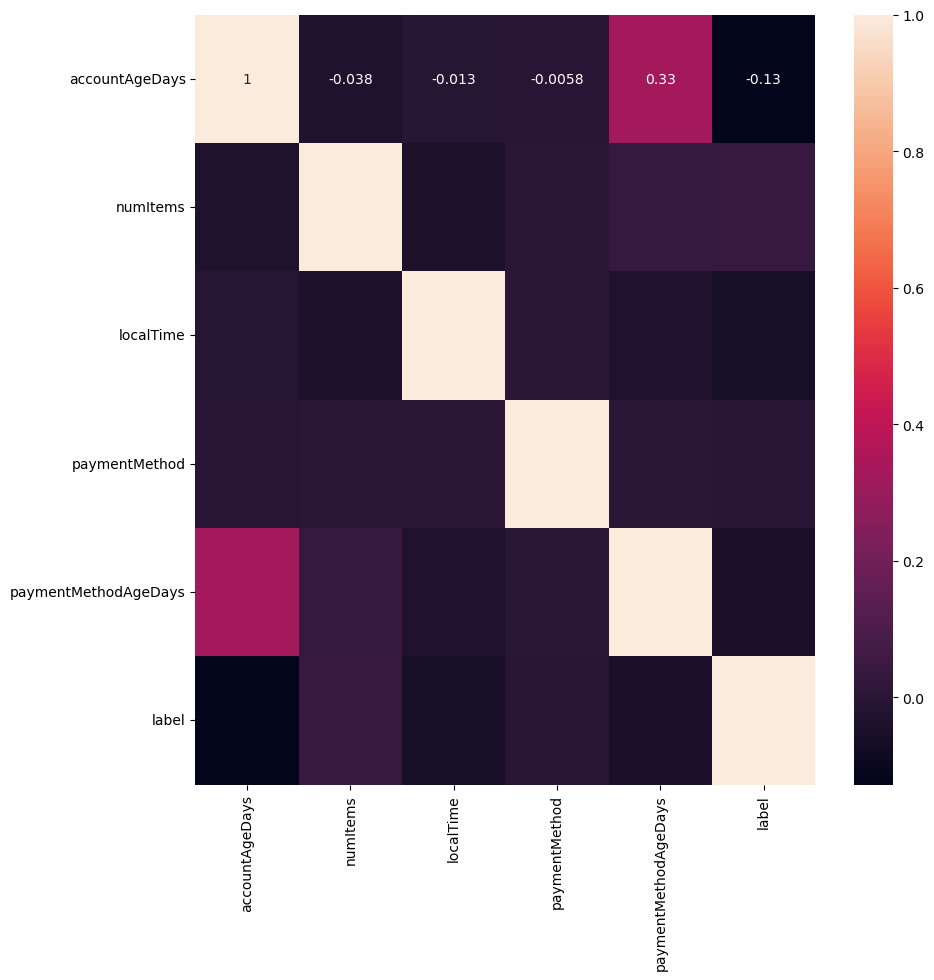

In [21]:
plt.figure(figsize=(10, 10))
sns.heatmap(data.corr(),annot=True)

In [23]:
## independent and dependent features
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

In [24]:
## scaling 

sc = StandardScaler()
X = sc.fit_transform(X)

In [25]:
## train test split 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [26]:
## logisticRegression Model
lg = LogisticRegression()

## training
lg.fit(X_train, y_train)

LogisticRegression()

In [27]:
## prediction 
pred = lg.predict(X_test)

In [28]:
print(accuracy_score(y_test, pred))

0.9855190699571691


In [29]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      9664
           1       0.00      0.00      0.00       142

    accuracy                           0.99      9806
   macro avg       0.49      0.50      0.50      9806
weighted avg       0.97      0.99      0.98      9806



C:\Users\Bhavya\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Bhavya\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Bhavya\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [31]:
print(confusion_matrix(y_test, pred))

[[9664    0]
 [ 142    0]]


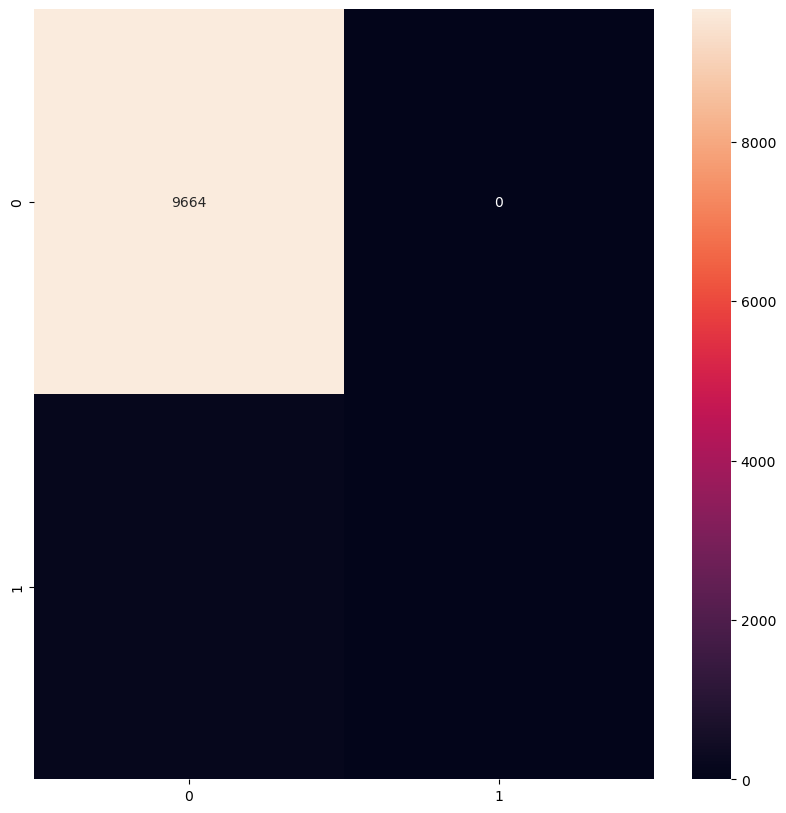

In [30]:
plt.figure(figsize=(10, 10));
sns.heatmap(confusion_matrix(y_test, pred), annot=True, fmt='g');